# 1. Import and Install dependencies

In [2]:
#!pip install tensorflow==2.17.0

In [4]:
#pip install tensorflow-gpu

In [6]:
#pip install opencv-python mediapipe scikit-learn matplotlib

In [8]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [33]:
pip install --upgrade opencv-python

Note: you may need to restart the kernel to use updated packages.


# 2. Keypoints using MP Holistic

In [35]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [37]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Color conversion BGR --> RGB
    image.flags.writable = False                    # Image is no longer writable
    results = model.process(image)                  # Make prediction
    image.flags.writable = True                     # Image is now writable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Color conversion RGB --> BGR
    return image, results

In [39]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Color conversion BGR --> RGB
    results = model.process(image)                  # Make prediction
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convert back to BGR after processing
    return image, results

In [41]:
def draw_landmarks(image, results):
    # Draw face landmarks with the correct connections
    if results.face_landmarks:
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    
    # Draw pose landmarks
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    
    # Draw left hand landmarks
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    
    # Draw right hand landmarks
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [43]:
# def draw_landmarks(image, results):
#    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS)          # Draw face connections   
#    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)          # Draw pose connections
#    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)     # Draw left hand connections
#    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)    # Draw right hand connections
    

In [45]:
def draw_styled_landmarks(image, results):
    if results.face_landmarks:
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2))
    
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2))
    
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,67), thickness=2, circle_radius=14),
                                 mp_drawing.DrawingSpec(color=(245,69,240), thickness=2, circle_radius=2))

In [48]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [50]:
import cv2

cap = cv2.VideoCapture(0) 
if not cap.isOpened():
    print("Cannot open camera")


In [113]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        
        # Read feed
        ret,frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # show to screen
        cv2.imshow('OpenCV Feed',image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows() 

I0000 00:00:1724772059.791881  283755 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 88.1), renderer: Apple M1 Pro
W0000 00:00:1724772059.857421  288935 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1724772059.865034  288935 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1724772059.867539  288939 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1724772059.867561  288933 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1724772059.868281  288941 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling supp

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [115]:
len(results.left_hand_landmarks.landmark)

21

In [117]:
frame

array([[[188, 200, 217],
        [191, 203, 220],
        [196, 208, 225],
        ...,
        [185, 218, 235],
        [171, 205, 227],
        [163, 197, 219]],

       [[193, 206, 222],
        [193, 206, 222],
        [196, 208, 225],
        ...,
        [183, 215, 232],
        [171, 206, 225],
        [163, 197, 217]],

       [[197, 209, 226],
        [196, 208, 225],
        [196, 208, 225],
        ...,
        [187, 217, 235],
        [178, 210, 230],
        [176, 208, 227]],

       ...,

       [[163, 180, 205],
        [163, 180, 205],
        [163, 180, 205],
        ...,
        [167, 179, 207],
        [165, 177, 205],
        [165, 177, 205]],

       [[160, 177, 203],
        [161, 179, 204],
        [163, 180, 205],
        ...,
        [166, 178, 206],
        [160, 171, 202],
        [161, 172, 203]],

       [[155, 172, 197],
        [159, 176, 202],
        [163, 180, 205],
        ...,
        [166, 178, 206],
        [163, 175, 205],
        [169, 181, 211]]

In [119]:
results

mediapipe.python.solution_base.SolutionOutputs

In [121]:
draw_landmarks(frame, results)

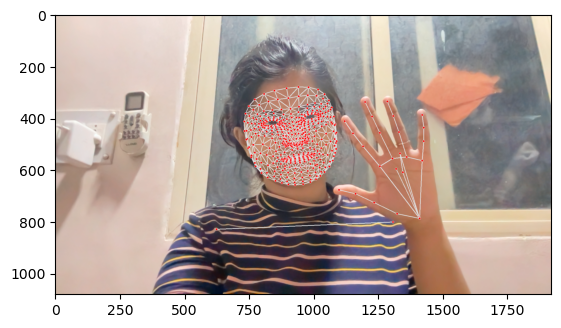

In [123]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [126]:
len(results.pose_landmarks.landmark)

33

In [128]:
len(results.face_landmarks.landmark)

468

In [130]:
results.pose_landmarks.landmark[0]
# pose have extra landmark for visibility

x: 0.4866865575313568
y: 0.4648784399032593
z: -0.6318886876106262
visibility: 0.9999943971633911

In [132]:
pose = [] 
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [134]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)  

lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)  
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)     


In [136]:
lh

array([ 7.35115469e-01,  7.29668081e-01,  2.80779290e-07,  6.89872563e-01,
        7.13664949e-01, -1.85653064e-02,  6.43318594e-01,  6.73465252e-01,
       -2.98401378e-02,  6.06083393e-01,  6.41688585e-01, -4.02623862e-02,
        5.72543025e-01,  6.28463984e-01, -5.10996170e-02,  6.54831588e-01,
        5.43842435e-01, -1.68651864e-02,  6.21050239e-01,  4.72716987e-01,
       -3.32037471e-02,  6.00556433e-01,  4.26422387e-01, -4.71352562e-02,
        5.84361792e-01,  3.82821083e-01, -5.80038168e-02,  6.80282772e-01,
        5.15748858e-01, -2.10639257e-02,  6.55129373e-01,  4.24826741e-01,
       -3.54866795e-02,  6.39266312e-01,  3.66191387e-01, -4.81527261e-02,
        6.25015438e-01,  3.13923448e-01, -5.78346513e-02,  7.09251165e-01,
        5.10838687e-01, -2.81594917e-02,  6.93489015e-01,  4.21313822e-01,
       -4.41319011e-02,  6.82216644e-01,  3.64387184e-01, -5.45052737e-02,
        6.70031309e-01,  3.12331945e-01, -6.21377863e-02,  7.40108371e-01,
        5.23539424e-01, -

In [138]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [140]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)  
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)  
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)     
    return np.concatenate([pose, face, lh, rh])

In [142]:
result_test = extract_keypoints(results)

In [144]:
result_test

array([ 0.48668656,  0.46487844, -0.63188869, ...,  0.        ,
        0.        ,  0.        ])

In [146]:
468*3+33*4+21*3+21*3

1662

In [148]:
np.save('0', result_test)

In [150]:
np.load('0.npy')

array([ 0.48668656,  0.46487844, -0.63188869, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [153]:
# Path for exported data, numpy arrays (storing)
DATA_PATH = os.path.join('MP_Data')

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are gounf to be 30 frames in length
sequence_length = 30

In [155]:
# hello
## 0
## 1
## 2
## ..
## 29

# thanks

# I love you

In [157]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [162]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    # New Loop
    # loop through actions
    for action in actions:
        # loop through sequences aka videos
        for sequence in range(no_sequences):
            # loop through video length aka sequence length
            for frame_num in range(sequence_length):
        
        # Read feed
                ret,frame = cap.read()
        
                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                print(results)
        
                # Draw landmarks
                draw_styled_landmarks(image, results)

                # New Apply wait logic
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200),
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)

                # New Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

        
                # show to screen
                cv2.imshow('OpenCV Feed',image)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    
    cap.release()
    cv2.destroyAllWindows() 

I0000 00:00:1724772132.217209  283755 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 88.1), renderer: Apple M1 Pro
W0000 00:00:1724772132.282320  289527 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1724772132.290230  289530 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1724772132.290893  289532 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1724772132.290919  289528 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1724772132.291129  289531 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling supp

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [164]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [167]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [169]:
label_map = {label:num for num, label in enumerate(actions)}

In [171]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [173]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))   
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])


In [175]:
np.array(sequences).shape

(90, 30, 1662)

In [177]:
np.array(labels).shape

(90,)

In [179]:
X = np.array(sequences)

In [181]:
X.shape

(90, 30, 1662)

In [183]:
y = to_categorical(labels).astype(int)

In [185]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
# 5% of data for testing

In [191]:
print(f'X_train', {X_train.shape})
print(f'X_test',  {X_test.shape})
print(f'y_train', {y_train.shape})
print(f'y_test',  {y_test.shape})


X_train {(85, 30, 1662)}
X_test {(5, 30, 1662)}
y_train {(85, 3)}
y_test {(5, 3)}


# 7. Build and Train LSTM Neural Network

In [222]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [224]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [226]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))      # we have set return_sequences --> false, because next layer is dense, so we can't pass     
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))


In [228]:
res = [.7,0.5,0.3]

In [230]:
actions[np.argmax(res)]

'hello'

In [232]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['categorical_accuracy']) 
                                    # multiclass classification model


In [234]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback]) 

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - categorical_accuracy: 0.3229 - loss: 1.3688
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.4246 - loss: 1.3915
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.3327 - loss: 3.3778
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.3835 - loss: 1.3766
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.4070 - loss: 1.8876
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.4227 - loss: 1.1738
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.2250 - loss: 1.8775
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.4834 - loss: 1.0969
Epoch 9/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.4794 - loss: 1.0403
Epoch 10/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.5049 - loss: 1.0027
Epoch 11/2000
3/3 ━━━━━━━━━━━

KeyboardInterrupt: 

In [236]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

# 8.Make Predictions

In [239]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


In [247]:
actions[np.argmax(res[1])]

'hello'

In [249]:
actions[np.argmax(y_test[1])]

'hello'

# 9. Save model

In [252]:
model.save('action.keras')

# 10. Evaluation using Confusion Matrix and Accuracy

In [255]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [257]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [259]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [261]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [0, 2]],

       [[4, 0],
        [1, 0]],

       [[2, 1],
        [0, 2]]])

In [263]:
accuracy_score(ytrue, yhat)

0.8

# 11. Test in Real Time

In [282]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

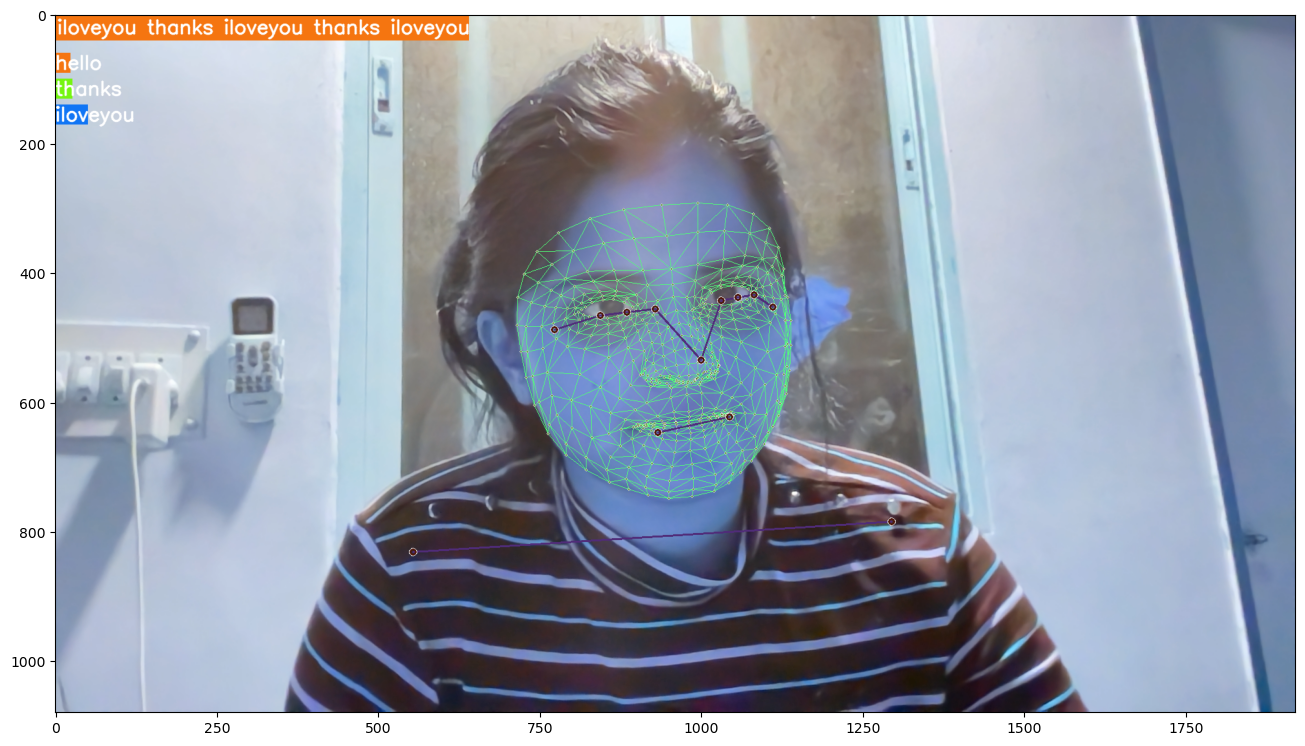

In [290]:
plt.figure(figsize=(16,16))
plt.imshow(prob_viz(res, actions, image, colors))

In [301]:
actions = np.array(['hello', 'thanks', 'iloveyou'])  # Ensure this matches the model output size
threshold = 0.3

cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        image, results = mediapipe_detection(frame, holistic)

        draw_styled_landmarks(image, results)

        keypoints = extract_keypoints(results)
        sequence.insert(0, keypoints)
        sequence = sequence[:30]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print("Model Output:", res)
            print(actions[np.argmax(res)])

            if res[np.argmax(res)] > threshold:
                if len(sentence) > 0:
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            

        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


I0000 00:00:1724780223.616736  283755 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 88.1), renderer: Apple M1 Pro
W0000 00:00:1724780223.685187  377185 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1724780223.692497  377185 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1724780223.693387  377186 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1724780223.693387  377182 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1724780223.693895  377190 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling supp

Model Output: [0.16802597 0.22479486 0.60717916]
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Model Output: [0.09991504 0.37282765 0.52725726]
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Model Output: [0.06152311 0.46435145 0.47412553]
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Model Output: [0.06385598 0.45568362 0.4804604 ]
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Model Output: [0.07644238 0.42218873 0.50136894]
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Model Output: [0.09550367 0.37908563 0.5254107 ]
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Model Output: [0.11953098 0.32565066 0.5548184 ]
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Model Output: [0.141211  0.2711449 0.5876441]
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Model Output: [0.15886122 0.2329415  0.6081973 ]
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Model Output: [0.19185728 0.18717435 0.6209684 ]
iloveyou
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Model Output: [0.21207865 0.16315055 0.6247

In [276]:
cap.release()
cv2.destroyAllWindows()